In [4]:
import pandas
import numpy
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import signal

# Funciones:

In [5]:
def mysarimax(Matriz,Y,order=(0,0,0),trend='c',seasonal_order=(0,0,0,12)):
    mod = sm.tsa.statespace.SARIMAX(Y,
                                    order=order,
                                    trend=trend,
                                    exog=numpy.asarray(Matriz),
                                    seasonal_order=seasonal_order)
    res = mod.fit(disp=False)
    res.plot_diagnostics(figsize=(18, 8))
    plt.show()
    f, Pxx_den = signal.periodogram(res.resid)
    plt.semilogy(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power spectral density')
    plt.show()
    DS=pandas.DataFrame()
    DS['freq']=f
    DS['pow']=Pxx_den
    DS['delay']=1/DS['freq']
    DS=DS.sort_values(by=['pow'],ascending=False).iloc[0:10]
    print(DS)
    print(res.summary())
    # Graph data
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=1000, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=1000, ax=axes[1])
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=100, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=100, ax=axes[1])
    # Plot data points
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:1000].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:1000].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:100].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:100].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.plot(ax=ax, style='.', label='Observada')
    res.fittedvalues.plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')

In [6]:
def mysarima(Y,order=(0,0,0),trend='c',seasonal_order=(0,0,0,12)):
    # Fit the model
    mod = sm.tsa.statespace.SARIMAX(Y,order=order,trend=trend,seasonal_order=seasonal_order)
    res = mod.fit(disp=False)
    res.plot_diagnostics(figsize=(18, 8))
    plt.show()
    f, Pxx_den = signal.periodogram(res.resid)
    plt.semilogy(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power spectral density')
    plt.show()
    DS=pandas.DataFrame()
    DS['freq']=f
    DS['pow']=Pxx_den
    DS['delay']=1/DS['freq']
    DS=DS.sort_values(by=['pow'],ascending=False).iloc[0:10]
    print(DS)
    print(res.summary())
    # Graph data
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=1000, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=1000, ax=axes[1])
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=100, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=100, ax=axes[1])
    # Plot data points
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:1000].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:1000].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:100].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:100].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.plot(ax=ax, style='.', label='Observada')
    res.fittedvalues.plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')

In [7]:
def mysarimax2(Matriz,Y,order=(0,0,0),trend='c',seasonal_order=(0,0,0,12),restriccion={}):
    mod = sm.tsa.statespace.SARIMAX(Y,
                                    order=order,
                                    trend=trend,
                                    exog=numpy.asarray(Matriz),
                                    seasonal_order=seasonal_order,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    res = mod.fit_constrained(restriccion)
    res.plot_diagnostics(figsize=(18, 8))
    plt.show()
    f, Pxx_den = signal.periodogram(res.resid)
    plt.semilogy(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power spectral density')
    plt.show()
    DS=pandas.DataFrame()
    DS['freq']=f
    DS['pow']=Pxx_den
    DS['delay']=1/DS['freq']
    DS=DS.sort_values(by=['pow'],ascending=False).iloc[0:10]
    print(DS)
    print(res.summary())
    # Graph data
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=1000, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=1000, ax=axes[1])
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=100, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=100, ax=axes[1])
    # Plot data points
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:1000].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:1000].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:100].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:100].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.plot(ax=ax, style='.', label='Observada')
    res.fittedvalues.plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')

In [8]:
def mysarima2(Y,order=(0,0,0),trend='c',restriccion={},seasonal_order=(0,0,0,12)):
    # Fit the model
    mod = sm.tsa.statespace.SARIMAX(Y,order=order,trend=trend,
                                    enforce_invertibility=False,
                                    seasonal_order=seasonal_order)
    res = mod.fit_constrained(restriccion)
    res.plot_diagnostics(figsize=(18, 8))
    plt.show()
    f, Pxx_den = signal.periodogram(res.resid)
    plt.semilogy(f, Pxx_den)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power spectral density')
    plt.show()
    DS=pandas.DataFrame()
    DS['freq']=f
    DS['pow']=Pxx_den
    DS['delay']=1/DS['freq']
    DS=DS.sort_values(by=['pow'],ascending=False).iloc[0:10]
    print(DS)
    print(res.summary())
    # Graph data
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=1000, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=1000, ax=axes[1])
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig = sm.graphics.tsa.plot_acf(res.resid, lags=100, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(res.resid, lags=100, ax=axes[1])
    # Plot data points
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:1000].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:1000].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.loc[0:100].plot(ax=ax, style='.', label='Observada')
    res.fittedvalues[0:100].plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')
    fig, ax = plt.subplots(figsize=(9,4))
    ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
    Y.plot(ax=ax, style='.', label='Observada')
    res.fittedvalues.plot(ax=ax, style='-', label='Predicha')
    legend = ax.legend(loc='upper right')

# Ejecucion:

In [9]:
Matriz=pandas.read_csv('Nilahue.csv',sep='|')
Matriz

,Unnamed: 0,momento,rrInst,rr6Horas,rr24Horas,hr,p0,qfe1,qff,qnh,...,td,tMin12Horas,tMax12Horas,Anno,Mes,Dia,Hora,Minuto,Hora_Min_t,Hora_Max_t
0,0,2018-01-01 00:00:00,0.0,0.0,0.0,60.4,1005.4,1005.6,1015.2,1015.3,...,9.5,17.3,29.6,2018,1,1,0,0,23,17
1,1,2018-01-01 00:01:00,0.0,0.0,0.0,60.6,1005.4,1005.6,1015.2,1015.3,...,9.6,17.3,29.6,2018,1,1,0,1,23,17
2,2,2018-01-01 00:02:00,0.0,0.0,0.0,60.3,1005.4,1005.6,1015.2,1015.3,...,9.5,17.3,29.6,2018,1,1,0,2,23,17
3,3,2018-01-01 00:03:00,0.0,0.0,0.0,60.6,1005.4,1005.6,1015.2,1015.3,...,9.5,17.3,29.6,2018,1,1,0,3,23,17
4,4,2018-01-01 00:04:00,0.0,0.0,0.0,61.0,1005.4,1005.6,1015.2,1015.3,...,9.5,17.3,29.6,2018,1,1,0,4,23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023016,1045835,2019-12-31 23:56:00,0.0,0.0,0.0,50.7,1001.0,1001.2,1010.7,1010.9,...,9.6,9.5,20.9,2019,12,31,23,56,9,0
1023017,1045836,2019-12-31 23:57:00,0.0,0.0,0.0,50.7,1001.1,1001.2,1010.7,1010.9,...,9.6,9.5,20.9,2019,12,31,23,57,9,0
1023018,1045837,2019-12-31 23:58:00,0.0,0.0,0.0,51.3,1001.1,1001.2,1010.7,1010.9,...,9.7,9.5,20.9,2019,12,31,23,58,9,0
1023019,1045838,2019-12-31 23:59:00,0.0,0.0,0.0,51.5,1001.1,1001.3,1010.8,1011.0,...,9.7,9.5,20.9,2019,12,31,23,59,9,0


In [10]:
Matriz_Resultados=Matriz.loc[:,'ts']

In [11]:
Matriz_Informacion_general=Matriz.loc[:,['rr6Horas','rr24Horas','radiacionGlobalAcumulada24Horas',
                                  'tMin12Horas','tMax12Horas','Mes','Hora','Hora_Min_t','Hora_Max_t']]

In [12]:
Intervalo=36#cada cuantos minutos consideramos valor

In [13]:
Matriz_Informacion_general=Matriz_Informacion_general.loc[range(0,len(Matriz_Resultados),Intervalo),:].reset_index().drop('index',axis=1)
Matriz_Resultados=Matriz_Resultados.loc[range(0,len(Matriz_Resultados),Intervalo)].reset_index().drop('index',axis=1)

In [14]:
IG=pandas.DataFrame()
for k in range(1,24):
    IG['H'+str(k)]=1*(Matriz_Informacion_general['Hora']==k)
for k in range(1,12):
    IG['M'+str(k)]=1*(Matriz_Informacion_general['Mes']==k)
IG['Constante']=1*(True)
IG['rr6Horas']=1*(Matriz_Informacion_general['rr6Horas'])
IG['rr24Horas']=1*(Matriz_Informacion_general['rr24Horas'])
IG['radiacionGlobalAcumulada24Horas']=1*(Matriz_Informacion_general['radiacionGlobalAcumulada24Horas'])
IG['tMin12Horas']=1*(Matriz_Informacion_general['tMin12Horas'])
IG['tMax12Horas']=1*(Matriz_Informacion_general['tMax12Horas'])
IG['Hora_Min_t']=1*(Matriz_Informacion_general['Hora_Min_t'])
IG['Hora_Max_t']=1*(Matriz_Informacion_general['Hora_Max_t'])

In [15]:
IG

,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,...,M10,M11,Constante,rr6Horas,rr24Horas,radiacionGlobalAcumulada24Horas,tMin12Horas,tMax12Horas,Hora_Min_t,Hora_Max_t
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,434.3,17.3,29.6,23,17
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,434.3,17.3,29.6,23,17
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,434.3,17.3,29.6,23,17
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,434.3,17.3,29.6,23,17
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,434.3,17.3,29.6,23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28413,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,532.8,9.5,20.9,9,0
28414,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,532.8,9.5,20.9,9,0
28415,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,532.8,9.5,20.9,9,0
28416,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.0,0.0,532.8,9.5,20.9,9,0


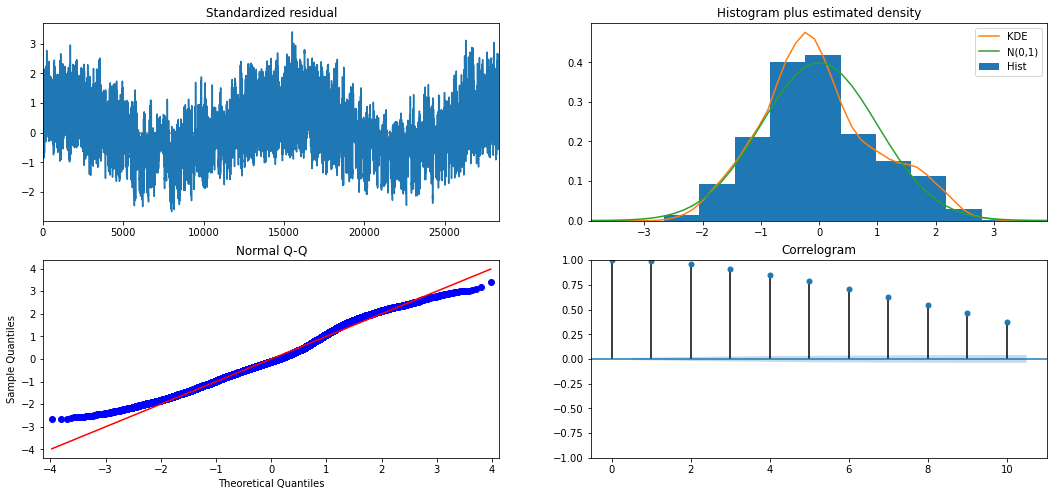

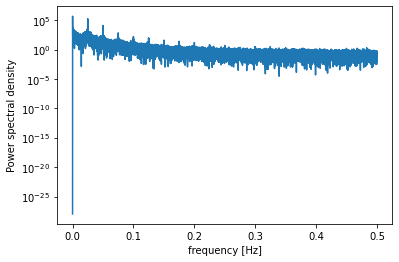

          freq            pow         delay
2     0.000070  455757.735358  14209.000000
710   0.024984  169360.162431     40.025352
712   0.025055  125581.881928     39.912921
711   0.025019  123925.695028     39.969058
714   0.025125   55541.681977     39.801120
708   0.024914   46267.698276     40.138418
709   0.024949   24751.685923     40.081805
706   0.024843   23495.553632     40.252125
707   0.024879   12197.977315     40.195191
1421  0.050004   12051.398601     19.998593
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                28418
Model:                        SARIMAX   Log Likelihood              -95780.742
Date:                Wed, 12 Aug 2020   AIC                         191565.484
Time:                        10:47:36   BIC                         191581.993
Sample:                             0   HQIC                        191570.795
                              - 28418     

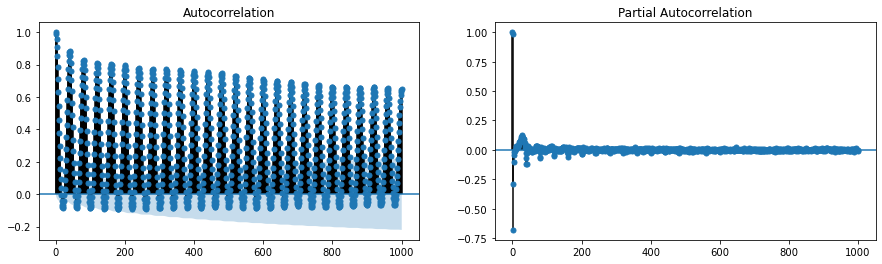

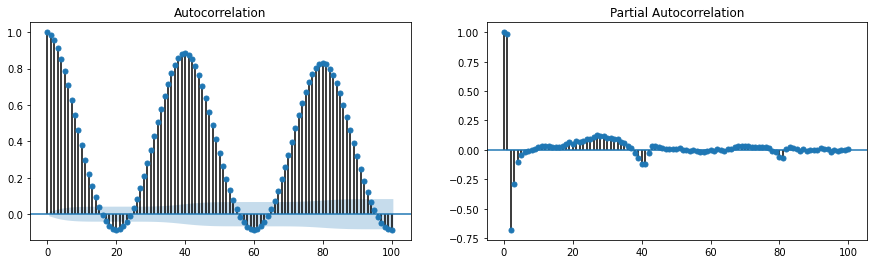

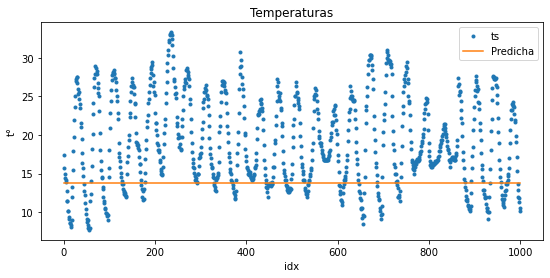

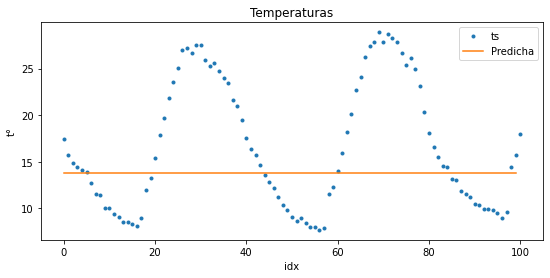

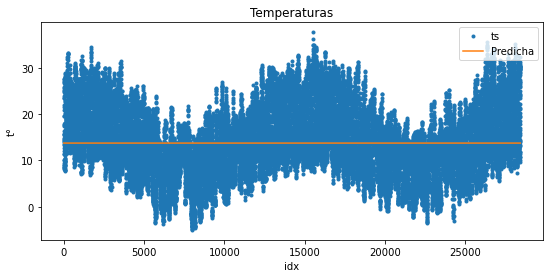

In [13]:
mysarima(Y=Matriz_Resultados)

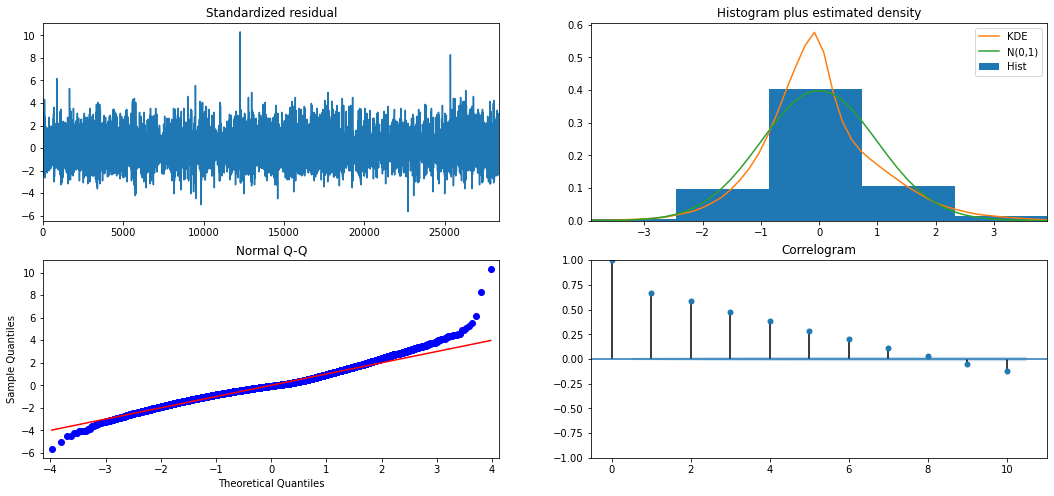

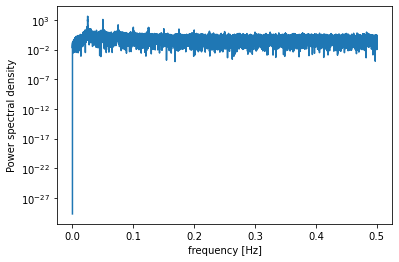

          freq          pow      delay
710   0.024984  4145.404959  40.025352
712   0.025055  3096.050537  39.912921
711   0.025019  3046.317406  39.969058
714   0.025125  1369.601824  39.801120
1421  0.050004  1189.749274  19.998593
708   0.024914  1120.182843  40.138418
1422  0.050039   715.282547  19.984529
709   0.024949   615.393884  40.081805
706   0.024843   572.191761  40.252125
707   0.024879   296.326774  40.195191
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                28418
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -43916.910
Date:                Wed, 12 Aug 2020   AIC                          87837.819
Time:                        10:48:07   BIC                          87854.329
Sample:                             0   HQIC                         87843.130
                              - 28418                                         
Covariance Type:  

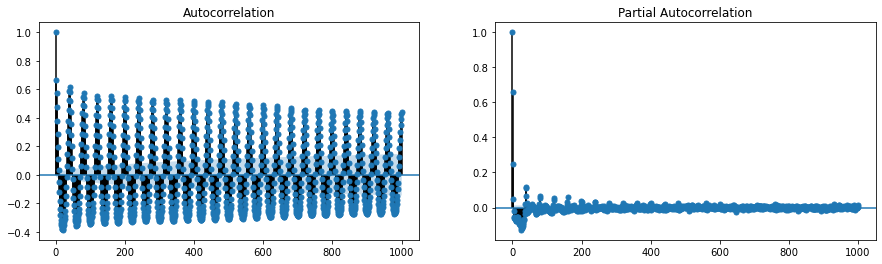

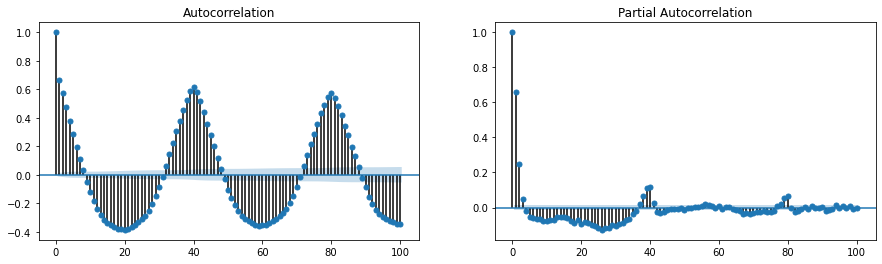

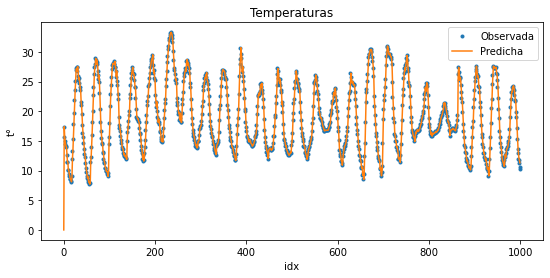

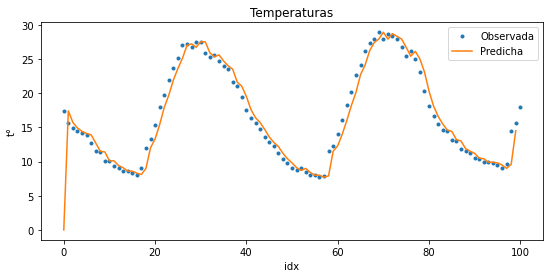

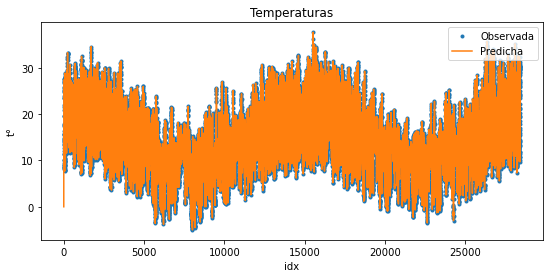

In [14]:
mysarima(Y=Matriz_Resultados['ts'],order=(0,1,0))

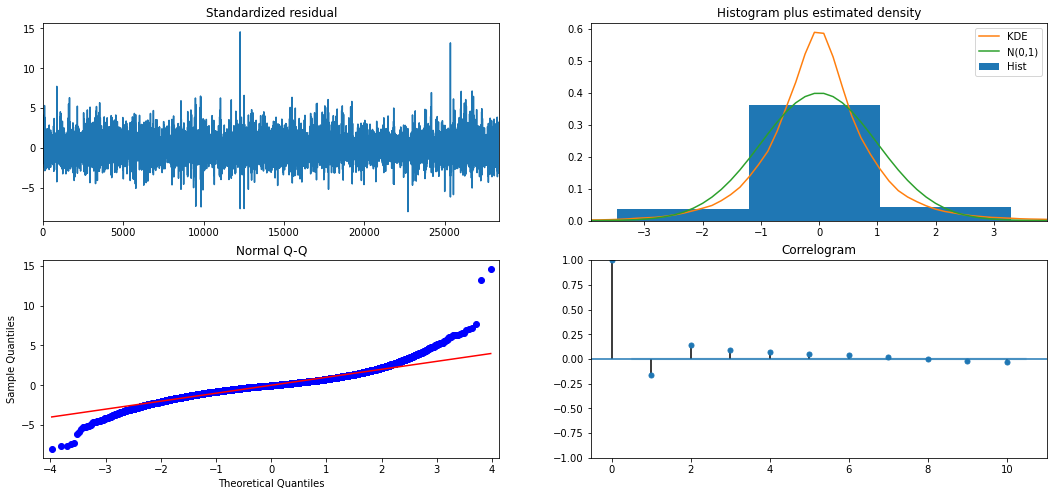

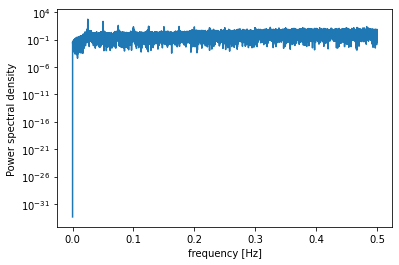

          freq         pow      delay
710   0.024984  522.472629  40.025352
712   0.025055  389.324446  39.912921
711   0.025019  385.530889  39.969058
1421  0.050004  209.237634  19.998593
714   0.025125  171.370232  39.801120
708   0.024914  140.069434  40.138418
1422  0.050039  127.585319  19.984529
709   0.024949   79.195959  40.081805
706   0.024843   71.814086  40.252125
1420  0.049968   41.356431  20.012676
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                28418
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -35517.467
Date:                Wed, 12 Aug 2020   AIC                          71040.933
Time:                        10:48:39   BIC                          71065.698
Sample:                             0   HQIC                         71048.900
                              - 28418                                         
Covariance Type:             

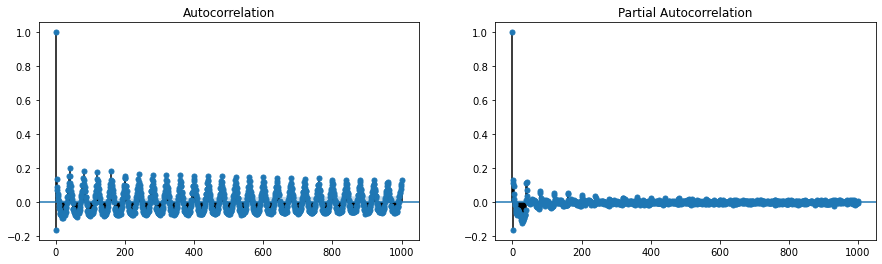

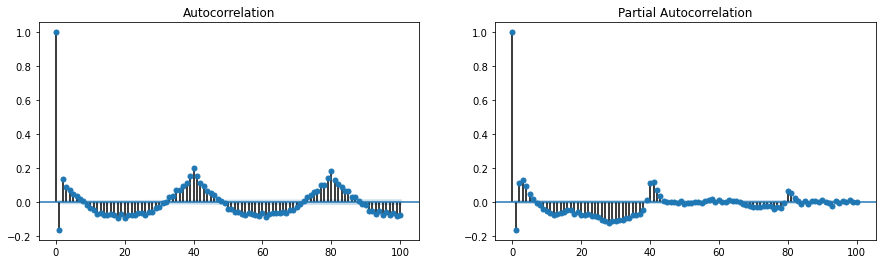

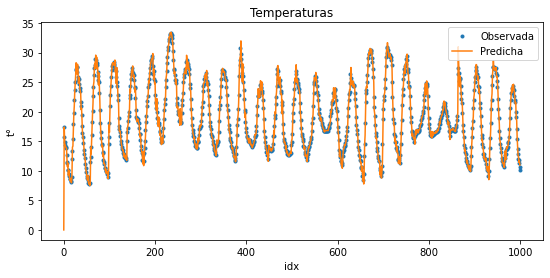

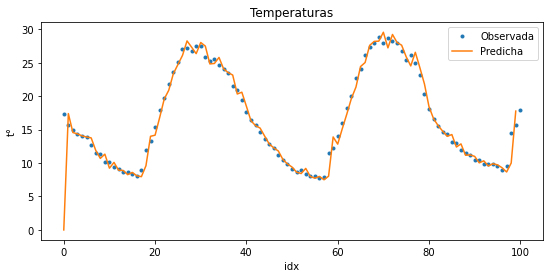

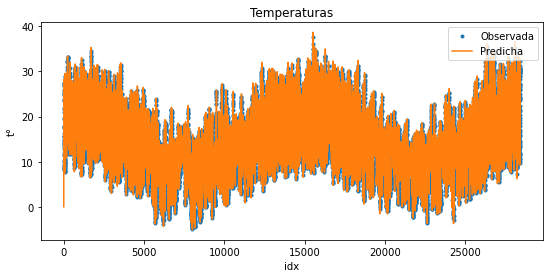

In [15]:
mysarima(Y=Matriz_Resultados['ts'],order=(1,1,0))

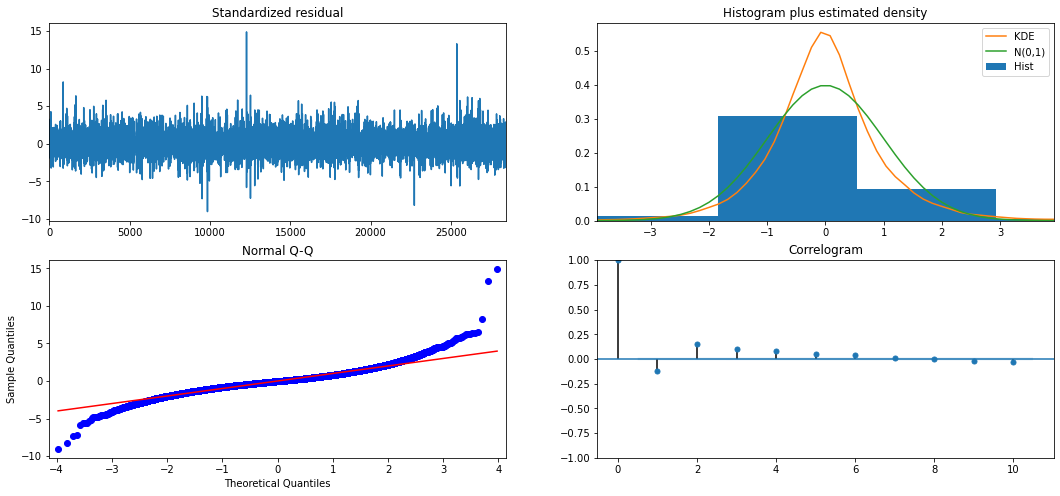

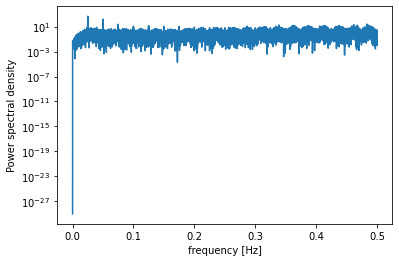

          freq         pow      delay
710   0.024984  483.028288  40.025352
712   0.025055  360.380883  39.912921
711   0.025019  355.853171  39.969058
1421  0.050004  161.765633  19.998593
714   0.025125  158.910447  39.801120
708   0.024914  129.883636  40.138418
1422  0.050039   98.169113  19.984529
709   0.024949   72.780317  40.081805
706   0.024843   66.687443  40.252125
707   0.024879   34.301766  40.195191
                                     SARIMAX Results                                      
Dep. Variable:                                 ts   No. Observations:                28418
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 40)   Log Likelihood              -34637.936
Date:                            Wed, 12 Aug 2020   AIC                          69283.873
Time:                                    10:51:39   BIC                          69316.892
Sample:                                         0   HQIC                         69294.495
                                    

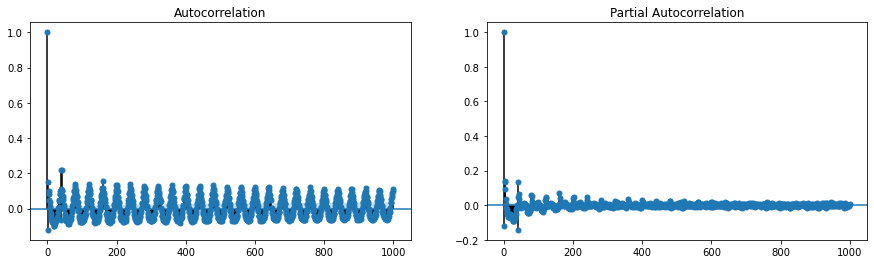

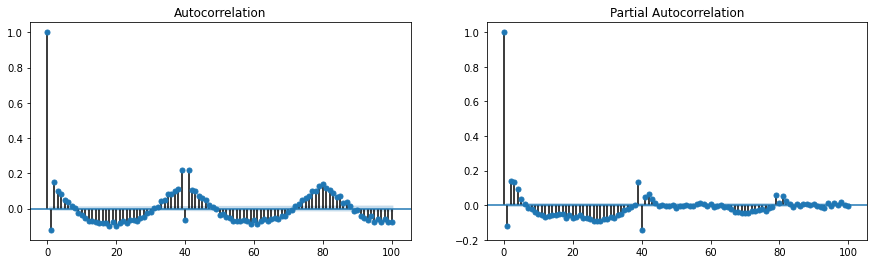

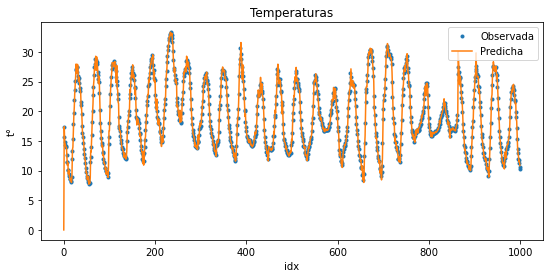

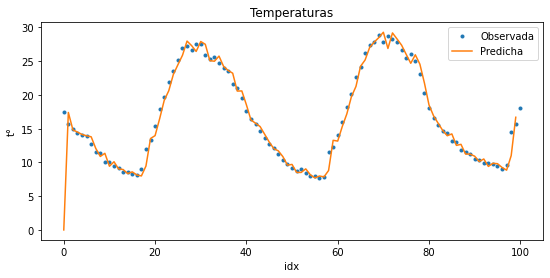

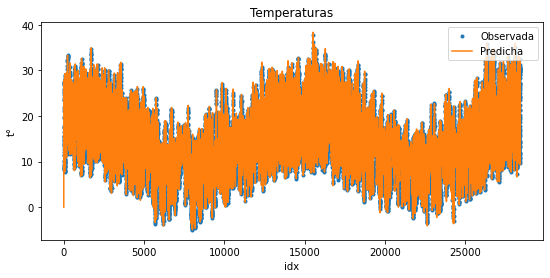

In [16]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,0,60*24/Intervalo))

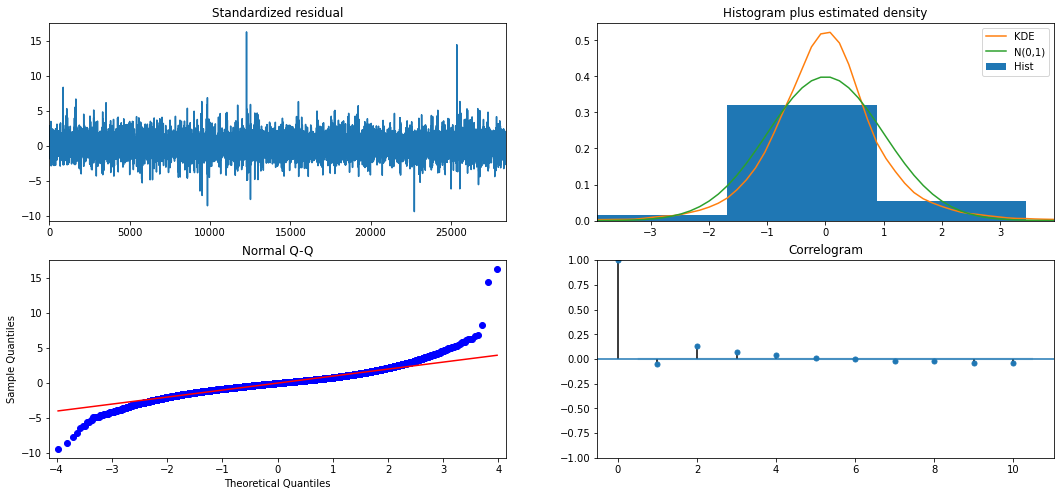

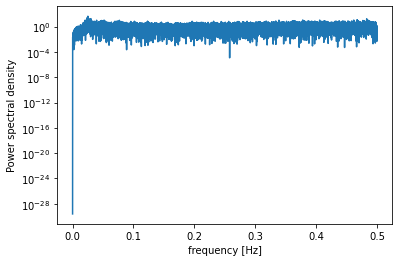

           freq        pow      delay
714    0.025125  43.233052  39.801120
712    0.025055  31.375916  39.912921
684    0.024069  25.978433  41.546784
710    0.024984  21.600709  40.025352
706    0.024843  20.226344  40.252125
708    0.024914  19.814762  40.138418
850    0.029911  18.116236  33.432941
723    0.025442  17.173662  39.305671
13731  0.483180  16.948827   2.069623
719    0.025301  16.806044  39.524339
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                28418
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 40)   Log Likelihood              -31936.800
Date:                              Wed, 12 Aug 2020   AIC                          63883.600
Time:                                      11:24:58   BIC                          63924.874
Sample:                                           0   HQIC                         63896.878
                        

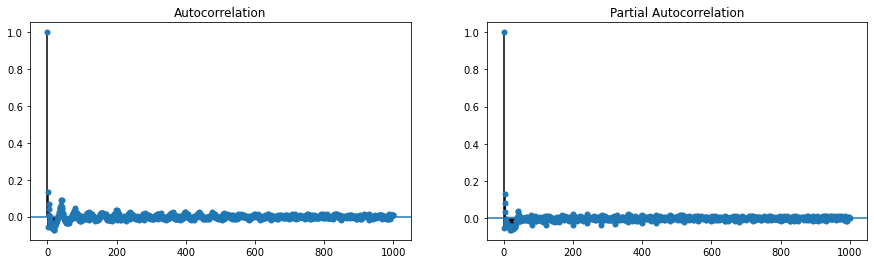

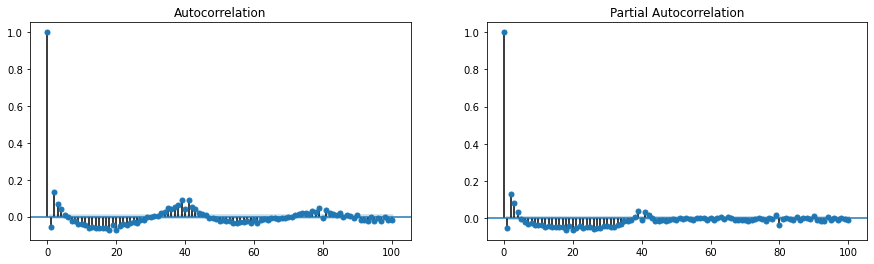

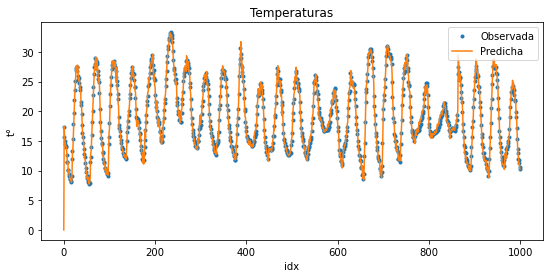

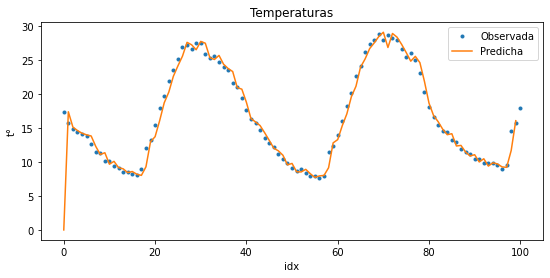

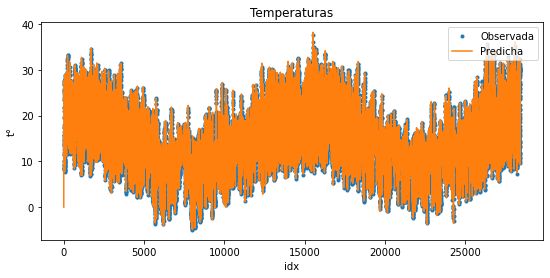

In [13]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo))

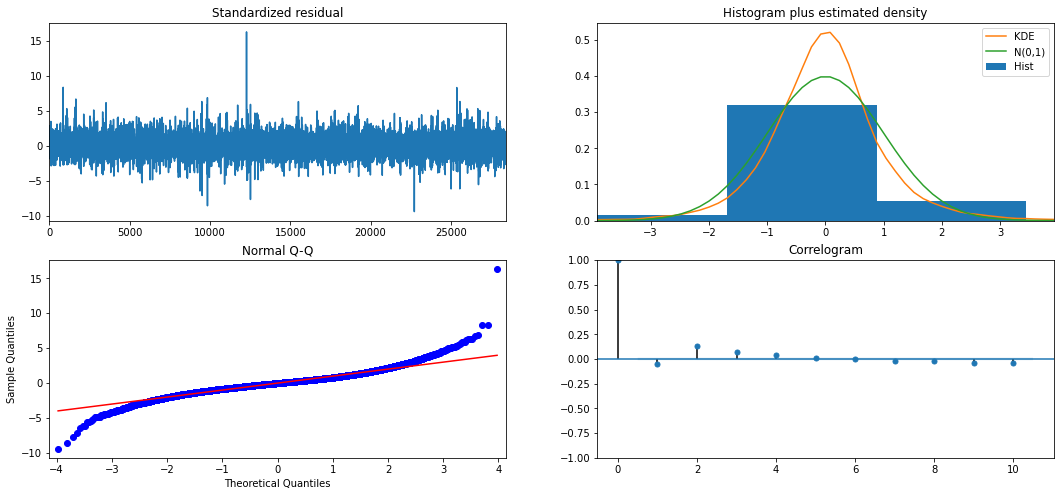

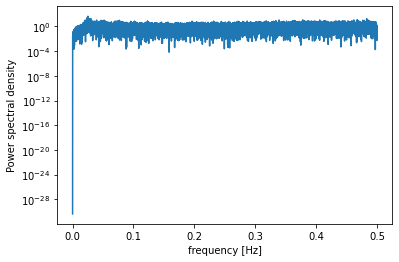

           freq        pow      delay
714    0.025125  43.003046  39.801120
712    0.025055  31.111811  39.912921
684    0.024069  26.254135  41.546784
710    0.024984  21.388487  40.025352
706    0.024843  20.306058  40.252125
708    0.024914  19.683411  40.138418
850    0.029911  17.813713  33.432941
13731  0.483180  17.099488   2.069623
723    0.025442  16.951507  39.305671
719    0.025301  16.579674  39.524339
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                28418
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 40)   Log Likelihood              -31893.501
Date:                              Wed, 12 Aug 2020   AIC                          63819.001
Time:                                      13:18:39   BIC                          63951.077
Sample:                                           0   HQIC                         63861.489
                        

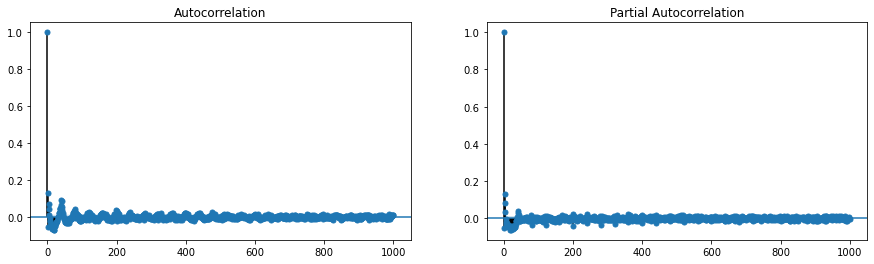

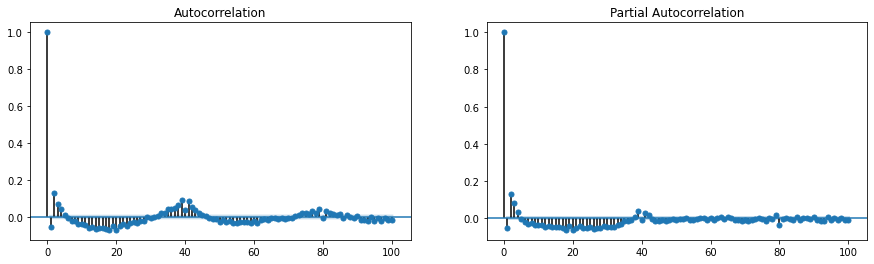

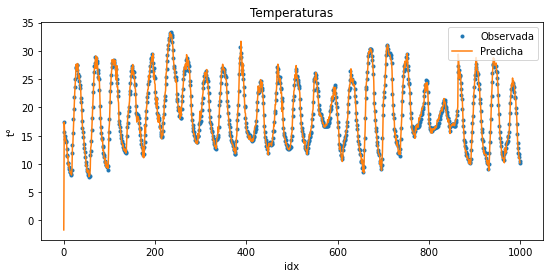

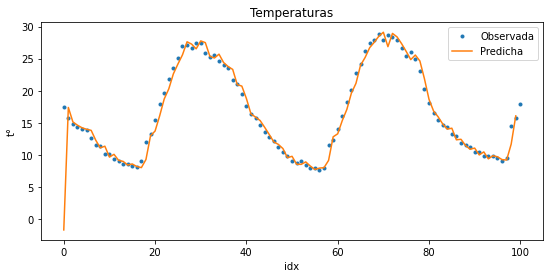

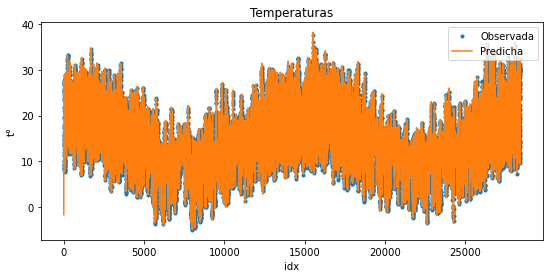

In [14]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11']])

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


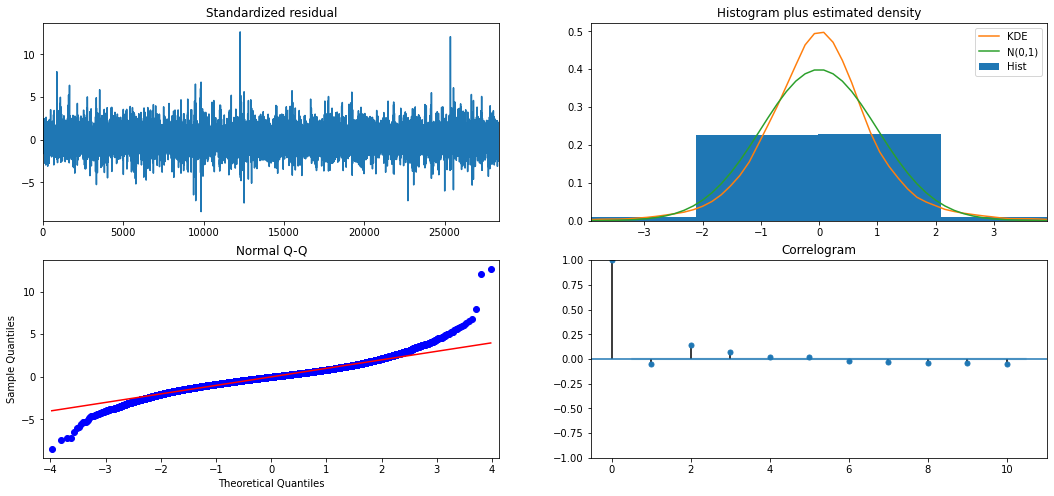

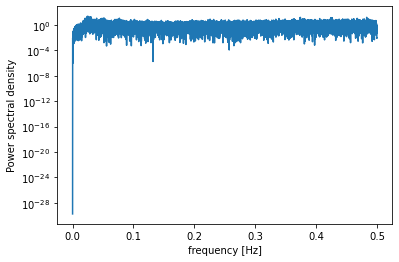

           freq        pow      delay
714    0.025125  23.914390  39.801120
684    0.024069  22.123169  41.546784
850    0.029911  20.195131  33.432941
768    0.027025  17.729402  37.002604
792    0.027870  17.124078  35.881313
13731  0.483180  16.145118   2.069623
10631  0.374094  15.972171   2.673126
653    0.022978  15.182761  43.519142
854    0.030051  15.042959  33.276347
12057  0.424273  14.503839   2.356971
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                28418
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 40)   Log Likelihood              -32482.900
Date:                              Wed, 12 Aug 2020   AIC                          65021.800
Time:                                      14:15:08   BIC                          65252.933
Sample:                                           0   HQIC                         65096.154
                        

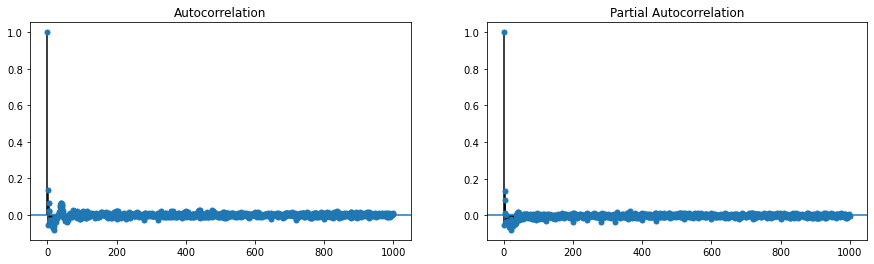

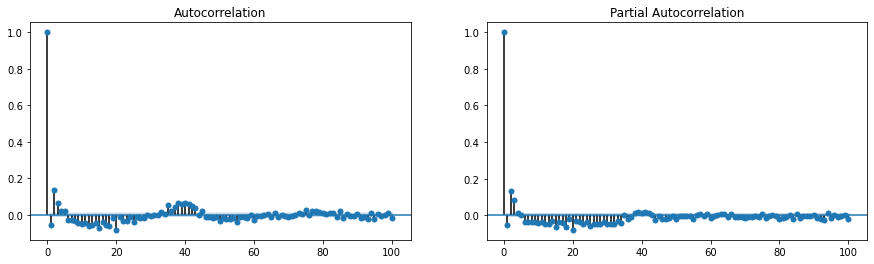

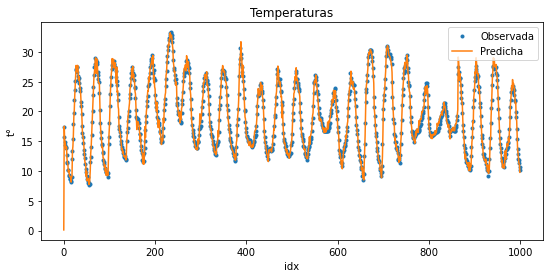

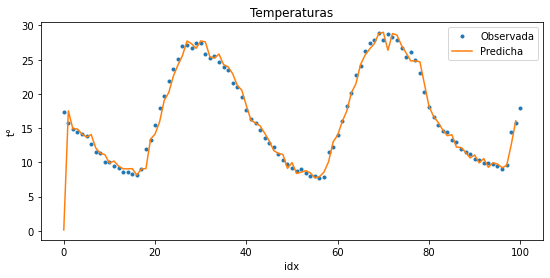

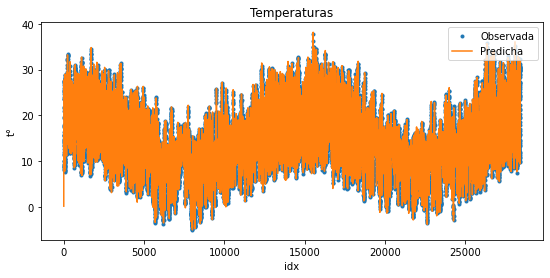

In [15]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
          Matriz=IG.loc[:,['H1','H2','H3','H4','H5','H6','H7','H8',
                           'H9','H10','H11','H12','H13','H14','H15',
                           'H16','H17','H18','H19','H20','H21','H22','H23']])

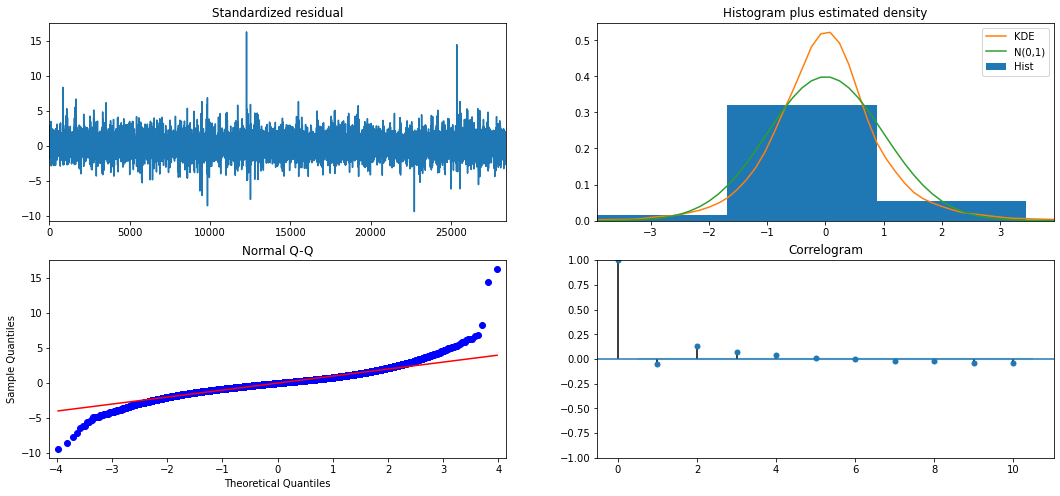

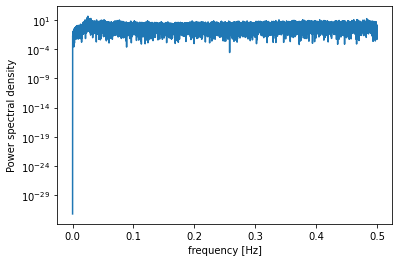

           freq        pow      delay
714    0.025125  43.263044  39.801120
712    0.025055  31.403554  39.912921
684    0.024069  25.976359  41.546784
710    0.024984  21.617013  40.025352
706    0.024843  20.236930  40.252125
708    0.024914  19.825580  40.138418
850    0.029911  18.120591  33.432941
723    0.025442  17.178014  39.305671
13731  0.483180  16.937193   2.069623
719    0.025301  16.801286  39.524339
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                28418
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 40)   Log Likelihood              -31936.675
Date:                              Wed, 12 Aug 2020   AIC                          63887.351
Time:                                      14:27:57   BIC                          63945.134
Sample:                                           0   HQIC                         63905.939
                        

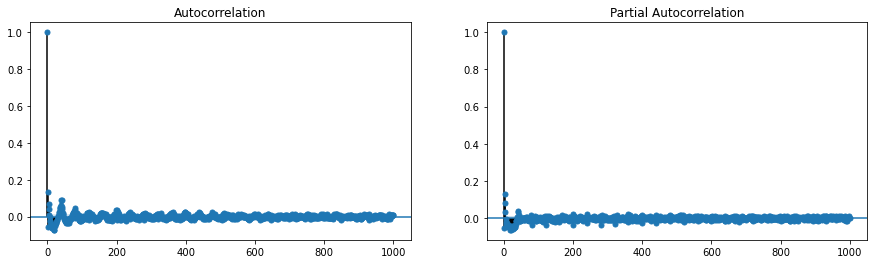

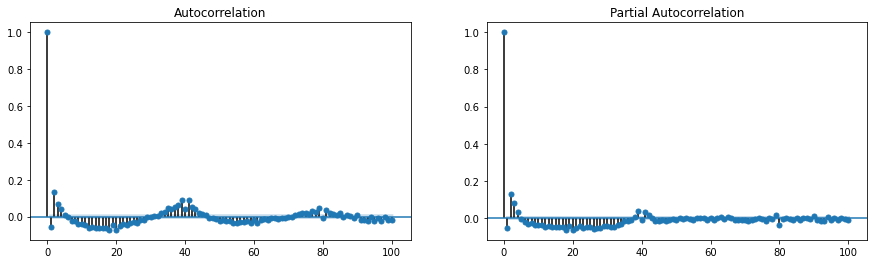

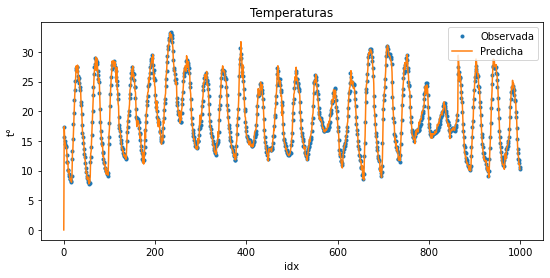

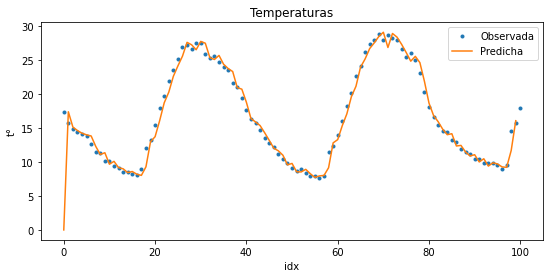

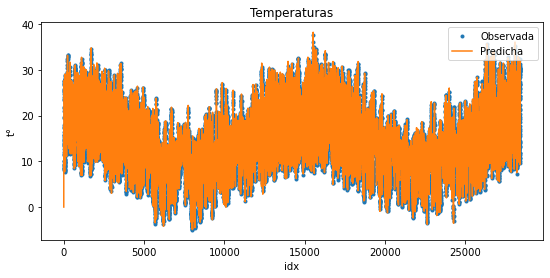

In [16]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['rr6Horas', 'rr24Horas']])

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


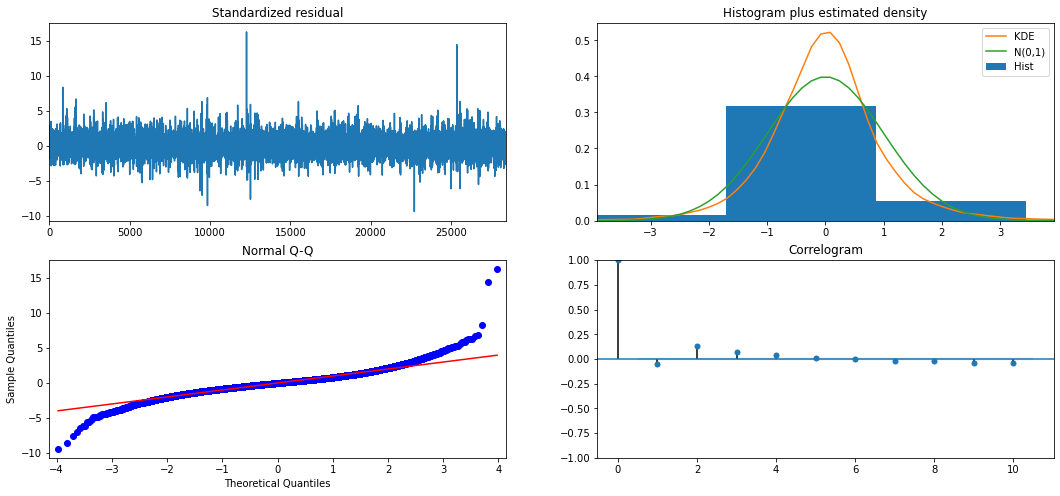

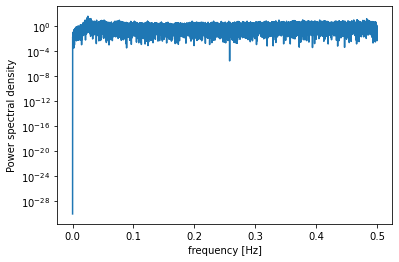

           freq        pow      delay
714    0.025125  42.972080  39.801120
712    0.025055  31.141047  39.912921
684    0.024069  25.877750  41.546784
710    0.024984  21.395602  40.025352
706    0.024843  20.135064  40.252125
708    0.024914  19.674750  40.138418
850    0.029911  17.981144  33.432941
723    0.025442  17.079783  39.305671
13731  0.483180  16.933930   2.069623
719    0.025301  16.711200  39.524339
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                28418
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 40)   Log Likelihood              -31935.766
Date:                              Wed, 12 Aug 2020   AIC                          63883.531
Time:                                      14:41:17   BIC                          63933.060
Sample:                                           0   HQIC                         63899.464
                        

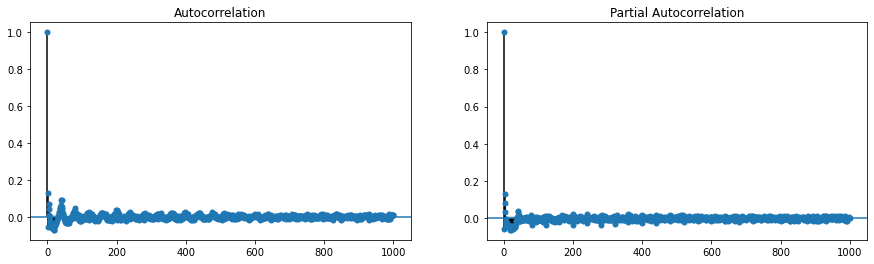

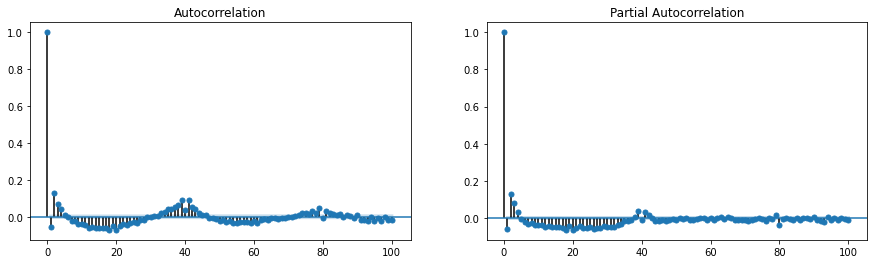

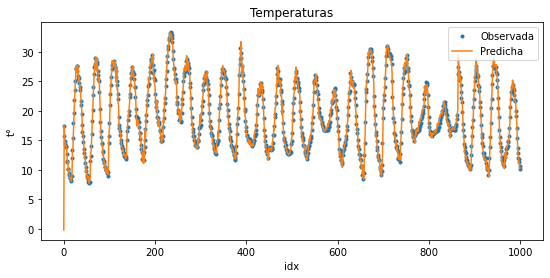

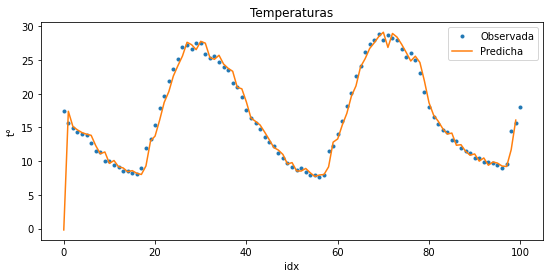

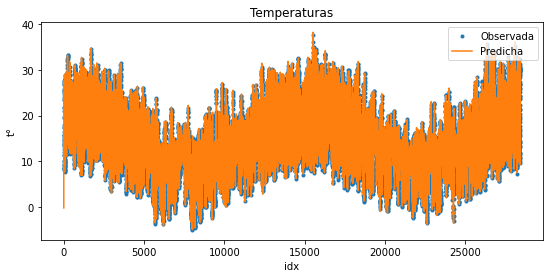

In [17]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['radiacionGlobalAcumulada24Horas']])

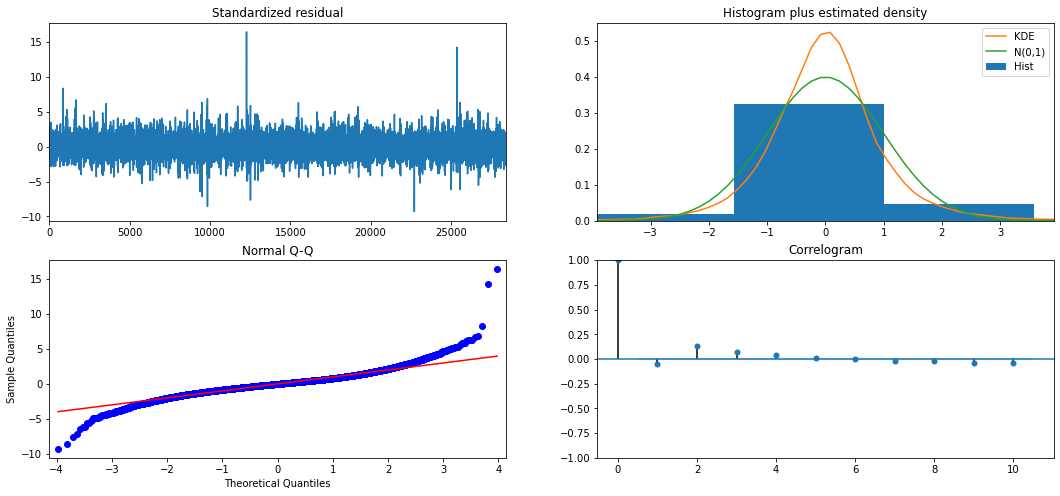

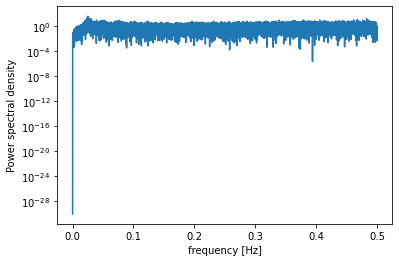

           freq        pow      delay
714    0.025125  43.015003  39.801120
712    0.025055  31.245294  39.912921
684    0.024069  25.891675  41.546784
710    0.024984  21.425118  40.025352
706    0.024843  19.916030  40.252125
708    0.024914  19.427338  40.138418
850    0.029911  17.893169  33.432941
13731  0.483180  17.079086   2.069623
723    0.025442  17.042895  39.305671
719    0.025301  16.652565  39.524339
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                28418
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 40)   Log Likelihood              -31929.927
Date:                              Wed, 12 Aug 2020   AIC                          63873.854
Time:                                      14:52:55   BIC                          63931.637
Sample:                                           0   HQIC                         63892.442
                        

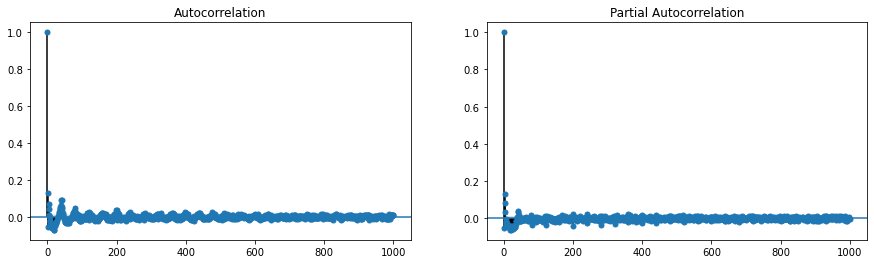

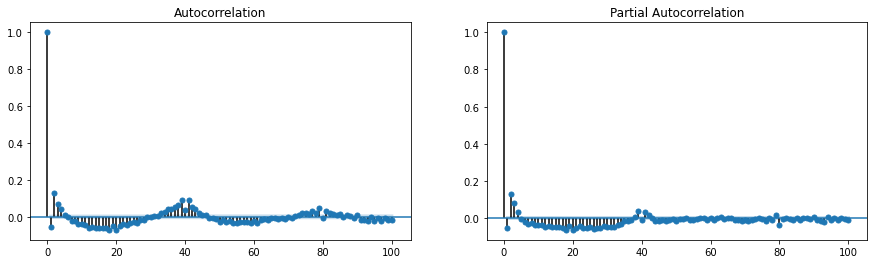

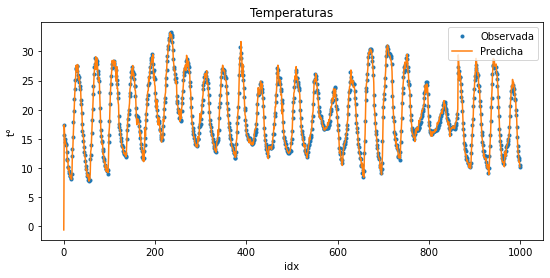

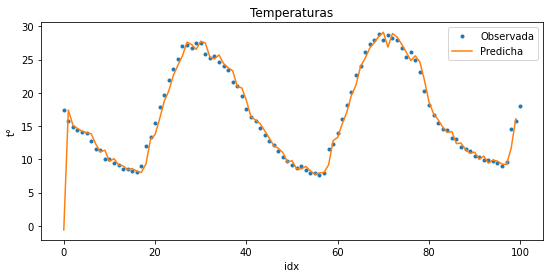

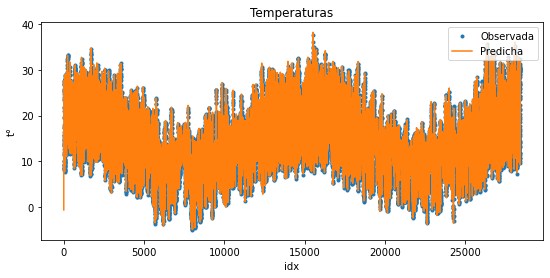

In [18]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['tMin12Horas', 'tMax12Horas']])

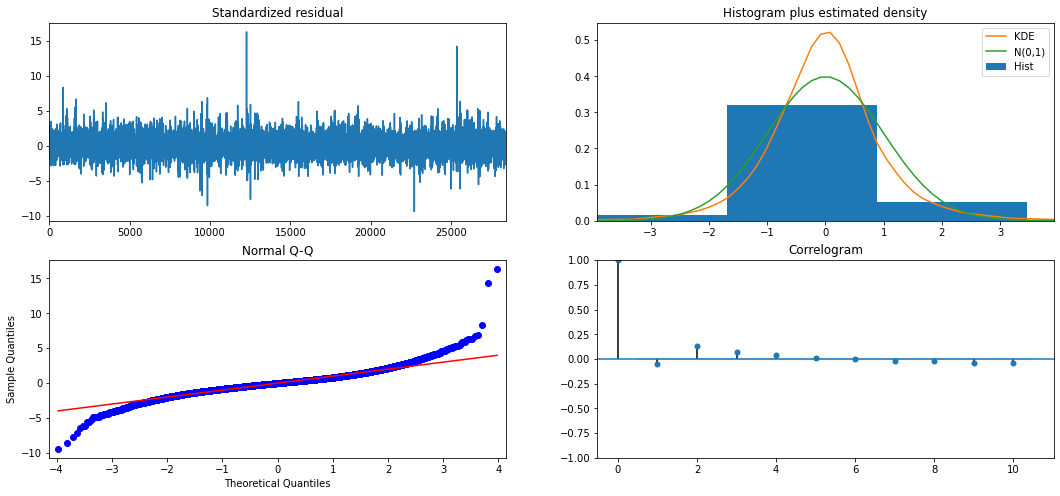

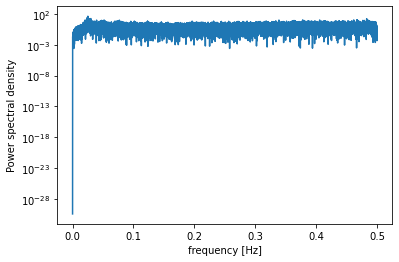

           freq        pow      delay
714    0.025125  43.082733  39.801120
712    0.025055  31.327758  39.912921
684    0.024069  25.766365  41.546784
710    0.024984  21.550216  40.025352
706    0.024843  19.931528  40.252125
708    0.024914  19.550539  40.138418
850    0.029911  18.150356  33.432941
723    0.025442  17.154119  39.305671
13731  0.483180  16.942084   2.069623
719    0.025301  16.706214  39.524339
                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                28418
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 40)   Log Likelihood              -31931.989
Date:                              Wed, 12 Aug 2020   AIC                          63877.978
Time:                                      15:05:16   BIC                          63935.761
Sample:                                           0   HQIC                         63896.566
                        

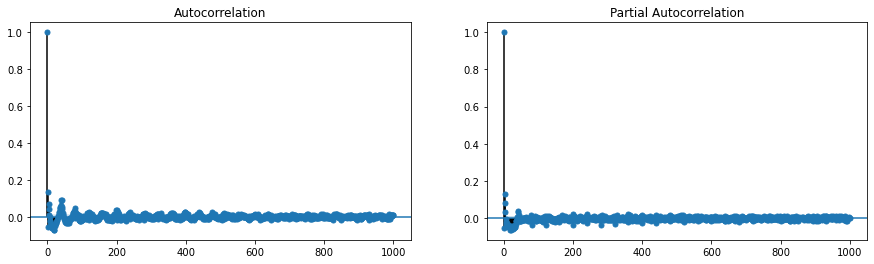

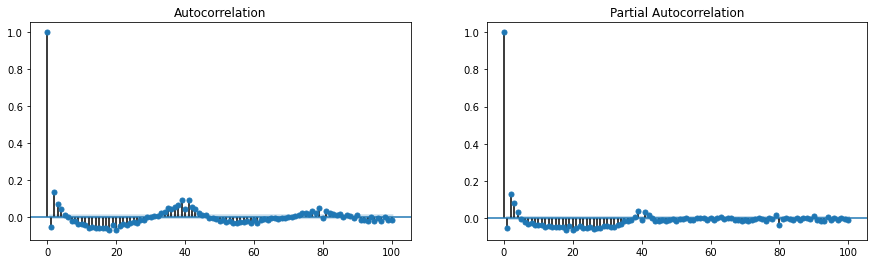

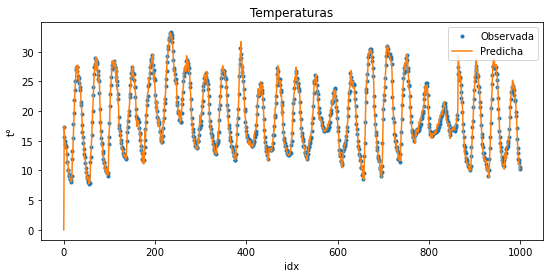

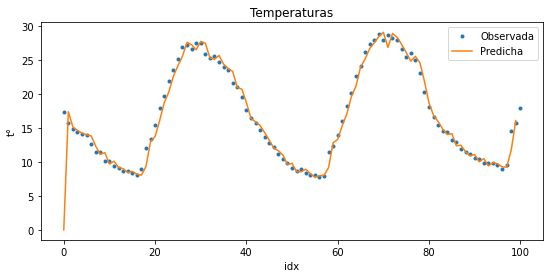

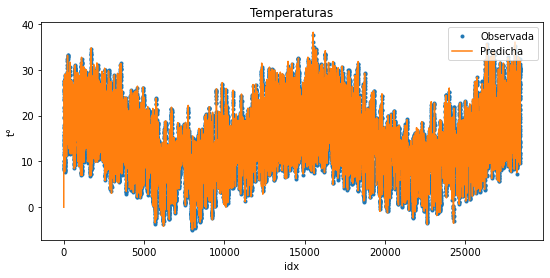

In [19]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(1,1,0),
         seasonal_order=(1,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['Hora_Min_t', 'Hora_Max_t']])

SARIMAX(1, 1, 0)x(1, 0, [1], 40) AIC: 63883.600  
Agregando Mes: AIC:  63819.001
Agregando Hora: AIC:  65021.800
Agregando RR: AIC:  63887.351
Agregando radiacionGlobalAcumulada24Horas: AIC:   63883.531 
Agregando tminmax: AIC:  63873.854
Agregando Htminmax: AIC:   63877.978

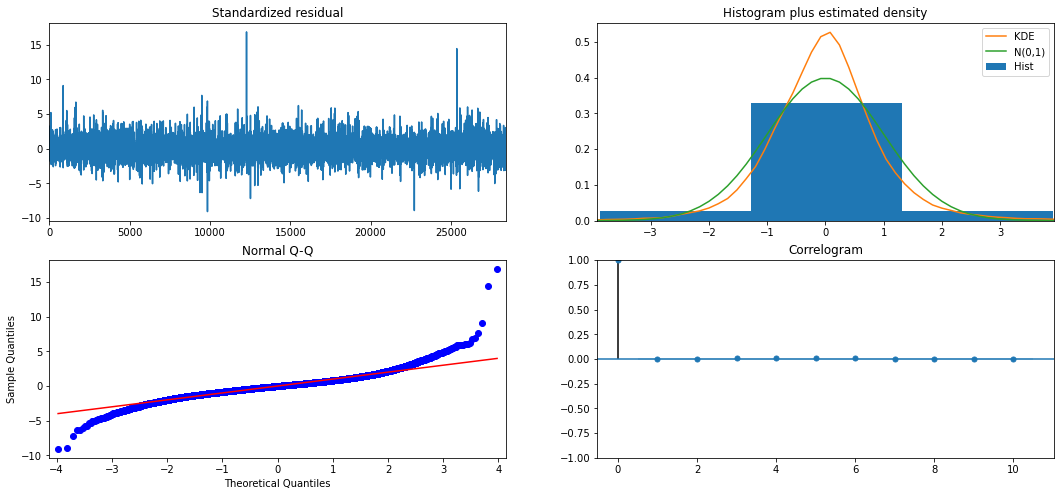

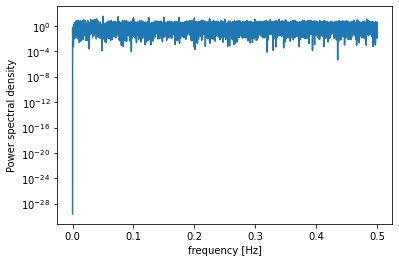

          freq        pow      delay
1421  0.050004  33.266038  19.998593
2133  0.075058  28.028384  13.323019
4264  0.150046  22.206580   6.664634
4973  0.174995  22.007242   5.714458
1422  0.050039  20.117302  19.984529
3553  0.125026  20.076770   7.998311
4265  0.150081  18.932966   6.663072
2842  0.100007  18.583272   9.999296
5685  0.200049  17.126763   4.998769
3550  0.124921  16.274077   8.005070
                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                28418
Model:              SARIMAX(40, 1, 0)   Log Likelihood              -30971.651
Date:                Wed, 12 Aug 2020   AIC                          62027.303
Time:                        15:48:53   BIC                          62374.002
Sample:                             0   HQIC                         62138.833
                              - 28418                                         
Covariance Type:                  opg   

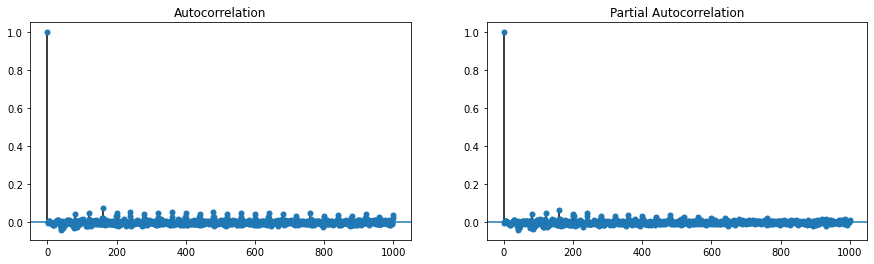

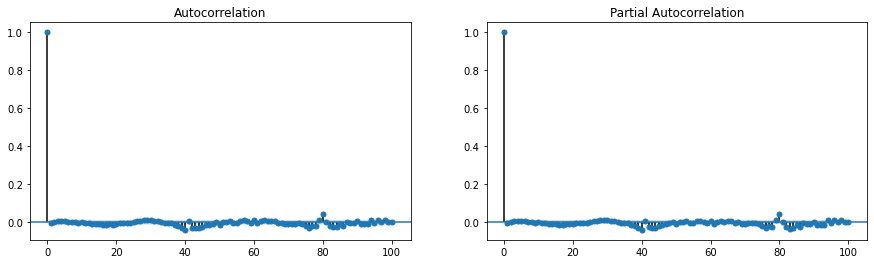

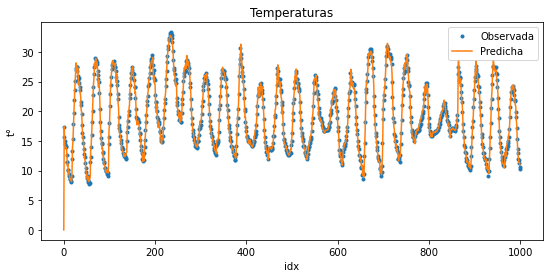

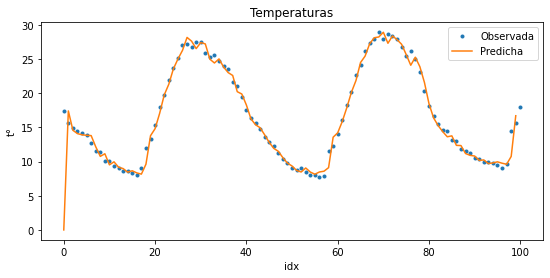

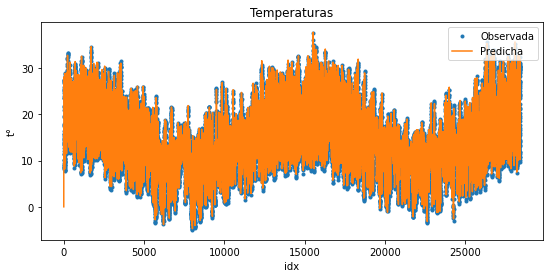

In [20]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(60*24/Intervalo,1,0))

/home/matias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


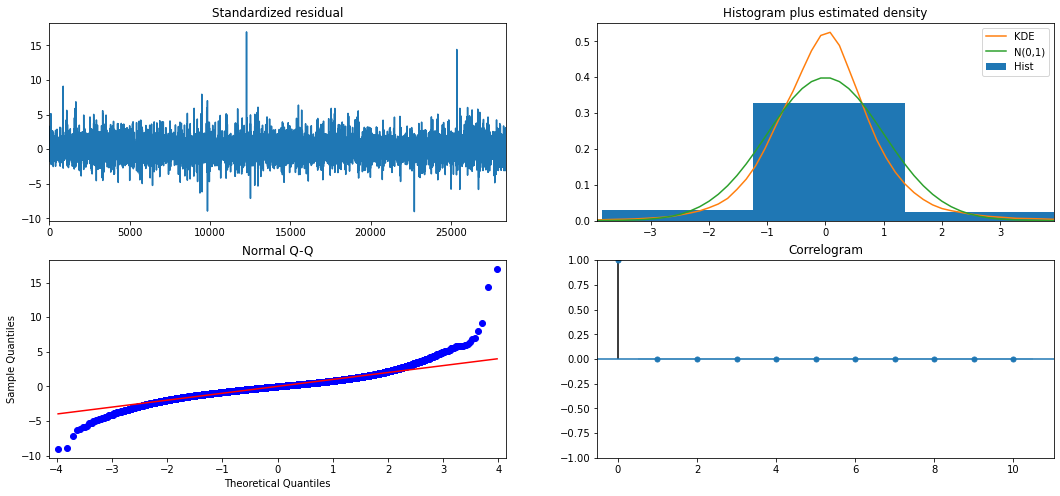

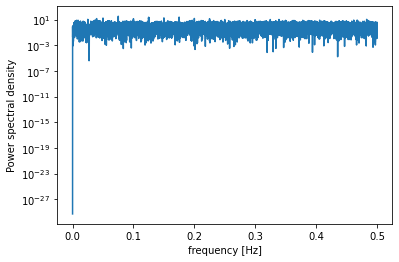

          freq        pow      delay
2133  0.075058  33.055158  13.323019
4973  0.174995  24.098812   5.714458
3553  0.125026  23.290504   7.998311
3550  0.124921  18.920509   8.005070
3556  0.125132  18.538693   7.991564
2135  0.075128  18.335235  13.310539
4264  0.150046  18.110779   6.664634
1421  0.050004  17.152673  19.998593
2128  0.074882  15.778803  13.354323
4265  0.150081  15.317729   6.663072
                                       SARIMAX Results                                       
Dep. Variable:                                    ts   No. Observations:                28418
Model:             SARIMAX(40, 1, 0)x(0, 0, [1], 20)   Log Likelihood              -30925.989
Date:                               Wed, 12 Aug 2020   AIC                          61937.979
Time:                                       19:33:05   BIC                          62292.933
Sample:                                            0   HQIC                         62052.164
                             

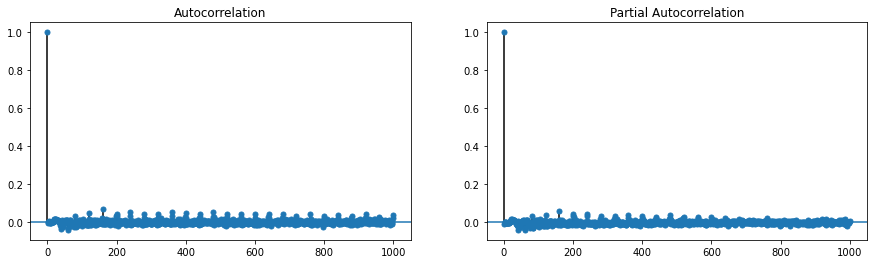

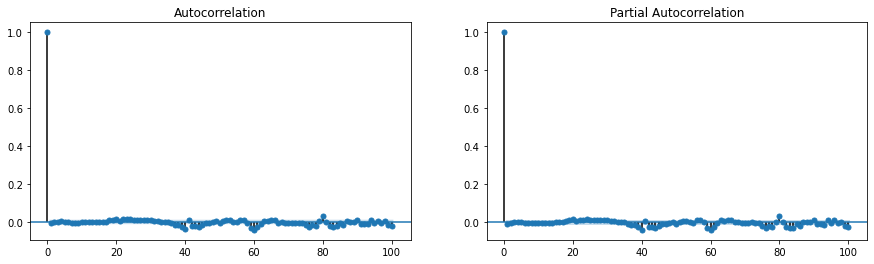

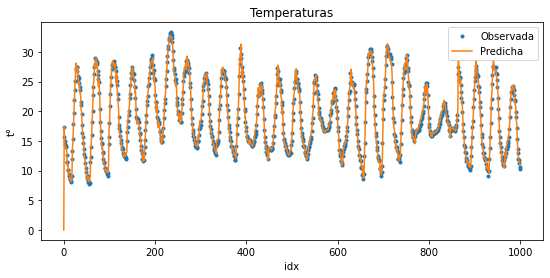

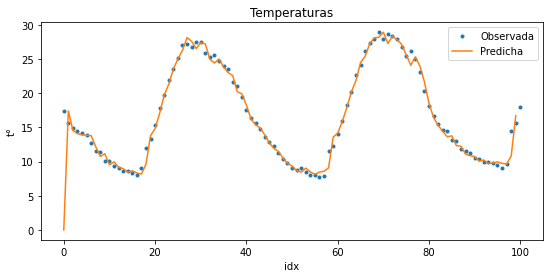

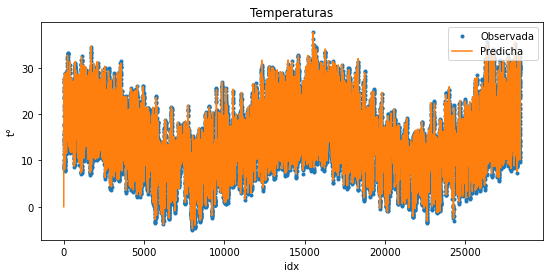

In [16]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(60*24/Intervalo,1,0),
         seasonal_order=(0,0,1,60*12/Intervalo))

In [ ]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(60*24/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo))

In [ ]:
mysarima(Y=Matriz_Resultados['ts'],
         order=(60*28/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo))

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*28/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['H1','H2','H3','H4','H5','H6','H7','H8',
                           'H9','H10','H11','H12','H13','H14','H15',
                           'H16','H17','H18','H19','H20','H21','H22','H23']])

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*28/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11']])

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*28/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['rr6Horas', 'rr24Horas']])

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*28/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['radiacionGlobalAcumulada24Horas']])

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*28/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['tMin12Horas', 'tMax12Horas']])

In [ ]:
mysarimax(Y=Matriz_Resultados['ts'],
         order=(60*28/Intervalo,1,0),
         seasonal_order=(0,0,1,60*24/Intervalo),
         Matriz=IG.loc[:,['Hora_Min_t', 'Hora_Max_t']])

SARIMAX(42, 1, 0)x(0, 0, [1], 36)  AIC:  
Agregando Mes: AIC: 
Agregando Hora: AIC: 
Agregando radiacionGlobalAcumulada24Horas: AIC: 
Agregando tminmax: AIC: 
Agregando Htminmax: AIC: 

In [ ]:
seasonal_order=(1,0,1,60*24/Intervalo)
Matriz=IG2